In [19]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile
from scipy.fftpack import fft
import librosa

In [20]:
def get_freqs(data, window_len):
    samples = []
    for x in range(0, len(data), window_len):
        sample = data[x:x+window_len]
        freqs = np.fft.rfft(sample)
        samples.append(freqs)
    return samples

In [21]:
def compute_mask(x, y):
    #compute mask between two 1d complex arrays 
    magn = lambda x, y: np.sqrt(x**2 + y**2)
    freq_mask = []
    for x_freq, y_freq in zip(x, y):
        if magn(x_freq.real, x_freq.imag) < magn(y_freq.real, y_freq.imag):
            freq_mask.append(0)
        else:
            freq_mask.append(1)
        freq_mask.append
    return freq_mask

In [22]:
mix_filename = '/home/maori/Documents/mllits/Project/MedleyDB_sample/Audio/LizNelson_Coldwar/LizNelson_Coldwar_MIX.wav'
vocal_filename = '/home/maori/Documents/mllits/Project/MedleyDB_sample/Audio/LizNelson_Coldwar/LizNelson_Coldwar_STEMS/LizNelson_Coldwar_STEM_02.wav'

fs, mix_data = wavfile.read(mix_filename)
mix_left, mix_right = mix_data[:, 0], mix_data[:,1]

fs, vocal_data = wavfile.read(vocal_filename)
vocal_left, vocal_right = vocal_data[:,0], vocal_data[:0,1]

WINDOW_LEN = 44100

mix_freqs = get_freqs(mix_left, WINDOW_LEN)
vocal_freqs = get_freqs(vocal_left, WINDOW_LEN)

samples_freq_mask = []
for x, y in zip(mix_freqs, vocal_freqs):
    samples_freq_mask.append(compute_mask(y, x))


/home/maori/anaconda3/lib/python3.5/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


(22051,)


(0.0, 2500000)

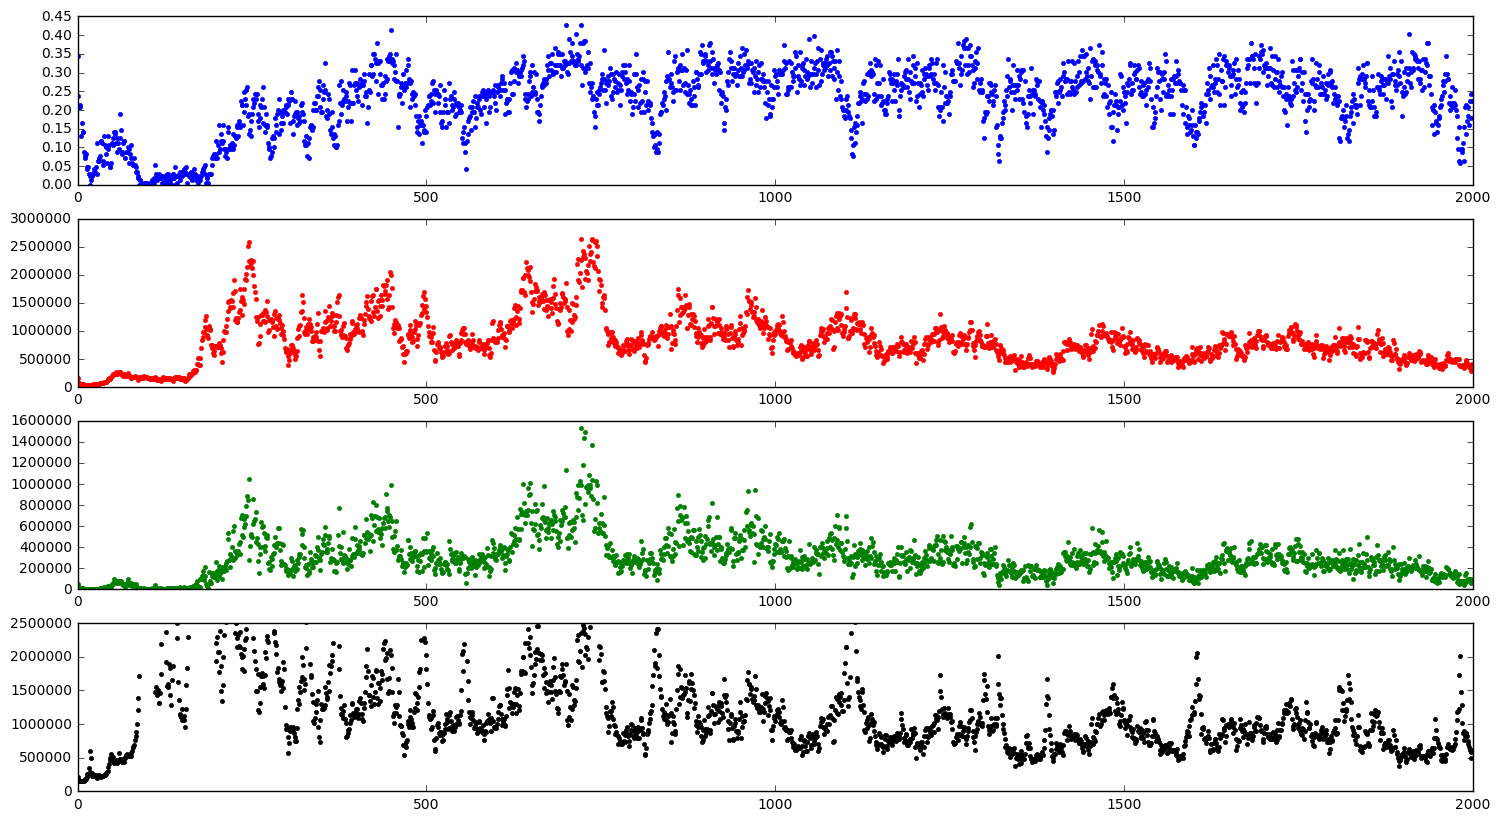

In [23]:
mix_freqs_mask = []
for x, y in zip(mix_freqs, samples_freq_mask):
    mix_freqs_mask.append(x * y)

sample_50 = samples_freq_mask[50]
samples_mask = np.average(samples_freq_mask[:-1], axis=0)
samples_vocal = np.average(np.abs(vocal_freqs[:-1]), axis=0)
samples_mix_mask = np.average(np.abs(mix_freqs_mask[:-1]), axis=0)
samples_mix = np.average(np.abs(mix_freqs[:-1]), axis=0)


print(samples_vocal.shape)
assert len(samples_vocal) == len(sample_50)


fig = plt.figure(figsize=(18,10), dpi=1600) 
ax1 = plt.subplot2grid((4, 1), (0, 0))
plt.plot(samples_mask[:2000], color="blue", linestyle="None", marker='.')
ax2 = plt.subplot2grid((4, 1), (1, 0))
plt.plot(samples_vocal[:2000], color="red", linestyle="None", marker='.')
ax3 = plt.subplot2grid((4, 1), (2, 0))
plt.plot(samples_mix_mask[:2000], color="green", linestyle="None", marker='.')
ax2 = plt.subplot2grid((4, 1), (3, 0))
plt.plot(samples_mix[:2000], color="black", linestyle="None", marker='.')
plt.ylim(ymax=2500000)



In [24]:
def compute_weight(x,y):
    #compute weight between two 1d complex arrays 
    freq_weight = []
    for x_freq, y_freq in zip(x, y):
        freq_weight.append((np.abs(x_freq) / np.abs(y_freq)))
    return freq_weight

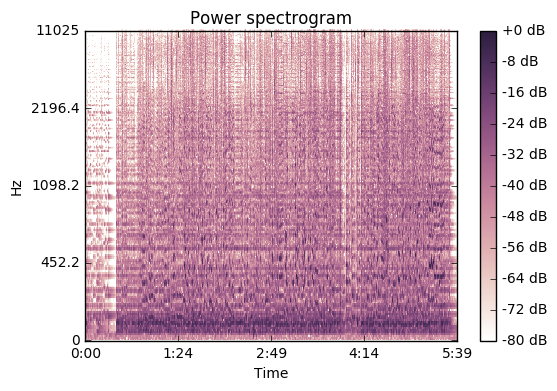

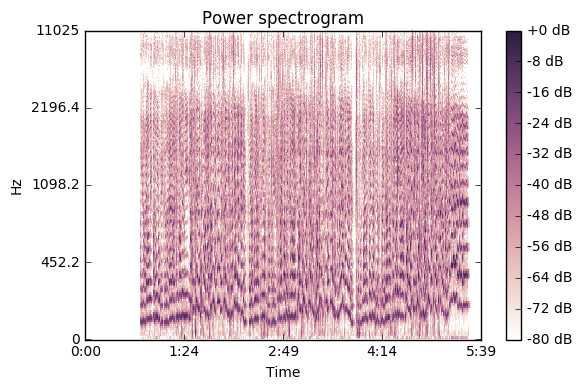

In [127]:
mix_freqs_l = librosa.core.stft(mix_left)
vocal_freqs_l = librosa.core.stft(vocal_left)
librosa.display.specshow(librosa.logamplitude(np.abs(mix_freqs_l)**2, ref_power=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
#plt.tight_layout()
plt.show()
librosa.display.specshow(librosa.logamplitude(np.abs(vocal_freqs_l)**2, ref_power=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()


(1025, 14642)


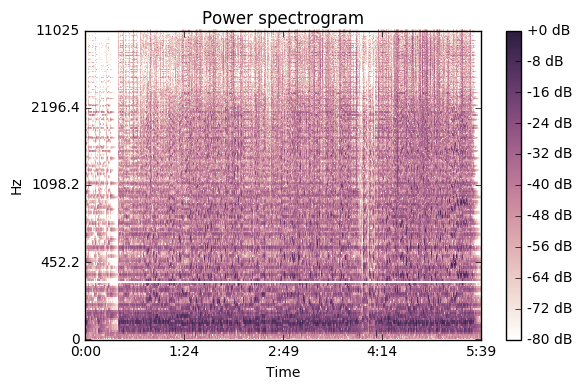

In [128]:
print(mix_freqs_l.shape)

mix_freqs_l[30]*= 0

librosa.display.specshow(librosa.logamplitude(np.abs(mix_freqs_l)**2, ref_power=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()



In [129]:
samples_l = librosa.core.istft(mix_freqs_l)
wavfile.write("result_2_librosa.wav", 44100, np.int16(samples_l))